# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Hồ Phước Hoàn
- MSSV: 22127119
- Lớp: 22CLC05

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import thêm thư viện nếu cần

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng cách khác nếu cần

# Cài đặt hàm

In [3]:
# Cài đặt các hàm cần thiết ở đây

# preprocess X_train and X_test
X_train_pre = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_pre = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# get features and features in short name strings
features = train.columns[:-1]
features_inshort = [''.join(map(lambda x: x[0], feature.split()[0:2])) for feature in features]

class OLSLinearRegression:
    def fit(self, X, y):
        ''' 
        This function is used to fit the model to the data. It uses the Ordinary Least Squares method to find the optimal weights.

        Parameters
        ----------
        X : np.array
            Input data
        y : np.array
            Output data

        Returns
        -------
        self : object
            Returns the instance of the class
        
        '''

        self.w = np.linalg.pinv(X) @ y # np.linalg.inv(X.T @ X) @ X.T @ y
        return self
    

    def getWeights(self):
        ''' 
        This function is used to get the weights of the model.

        Returns
        -------
        self.w : np.array
            Optimal weights (column vector)
        '''

        return self.w


    def predict(self, X):
        ''' 
        This function is used to predict the output of the model.

        Parameters
        ----------
        X : np.array
            Input data

        Returns
        -------
        X @ self.w : np.array
            Predicted output
        '''

        return X @ self.w
    

def MAE(y, y_pred):
    ''' 
    This function is used to calculate the mean absolute error (MAE).

    Parameters
    ----------
    y : np.array
        Output data
    y_pred : np.array
        Predicted output data

    Returns
    -------
    np.mean(np.abs(y.ravel() - y_pred.ravel())) : float
        Mean absolute error
    '''

    return np.mean(np.abs(y.ravel() - y_pred.ravel()))


def linear_regression_model(models, y_train_shuffle, k=5):
    y_fold = np.vsplit(y_train_shuffle.to_numpy().reshape(-1, 1), k)
    MAE_features = [] # MAE of each model after using k-fold cross validation (already mean MAE_feature list)
    for model in models:
        MAE_feature = [] # MAE after using k-fold cross validation in each feature
        X_fold = np.vsplit(model, k) # split each feature_set in to k fold, v_split: split in vertically (row-wise)
        for i in range(k):
            X_test_i = X_fold[i]
            y_test_i = y_fold[i]

            # pop value at index i and store to temp variable
            X_temp = X_fold.pop(i) 
            y_temp = y_fold.pop(i)

            # stack again after split into discrete arrays (vstack: row_wise)
            X_train_i = np.vstack(X_fold)
            y_train_i = np.vstack(y_fold)

            # insert value back to array at index i
            X_fold.insert(i, X_temp)
            y_fold.insert(i, y_temp)

            LR_i = OLSLinearRegression().fit(X_train_i, y_train_i)

            MAE_feature.append(MAE(y_test_i, LR_i.predict(X_test_i)))

        MAE_features.append(np.mean(MAE_feature))
    return MAE_features

*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

*** Description about each feature***
       Hours Studied  Previous Scores  Extracurricular Activities  \
count    9000.000000      9000.000000                 9000.000000   
mean        4.976444        69.396111                    0.493667   
std         2.594647        17.369957                    0.499988   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

       Sleep Hours  Sample Question Papers Practiced  Performance Index  
count  9000.000000                       9000.000000        9000.000000  
mean      6.535556                          4.590889          55.136333  
std       1.695533                          2.864570          19.187669  
min       4.000000                          

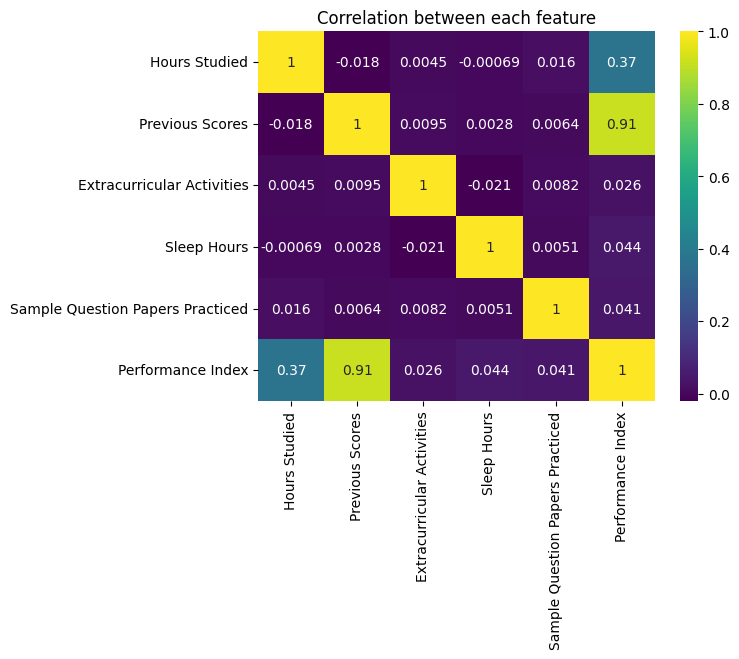

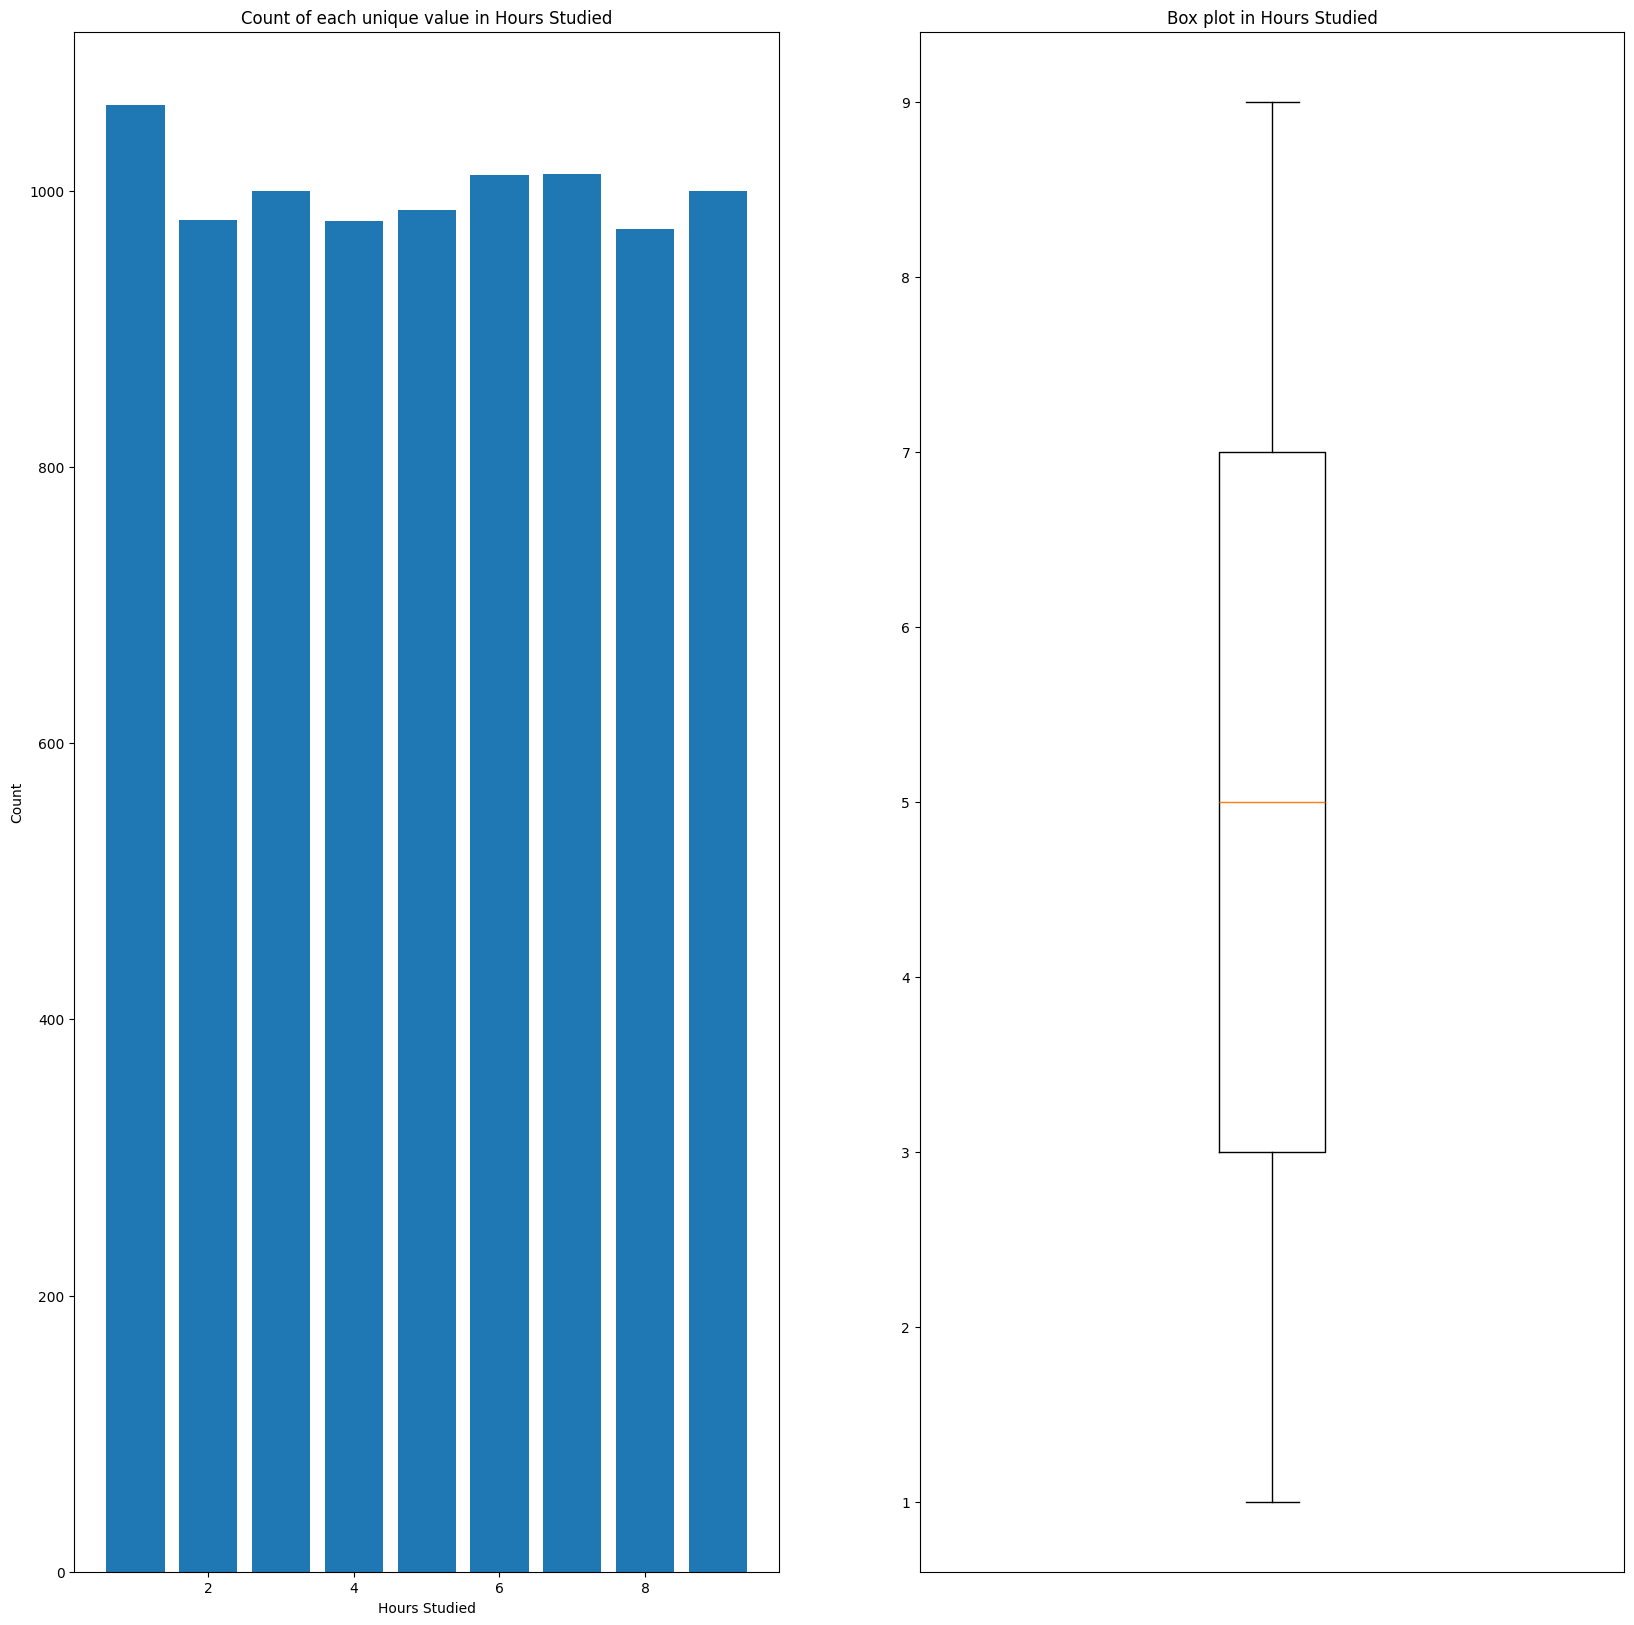

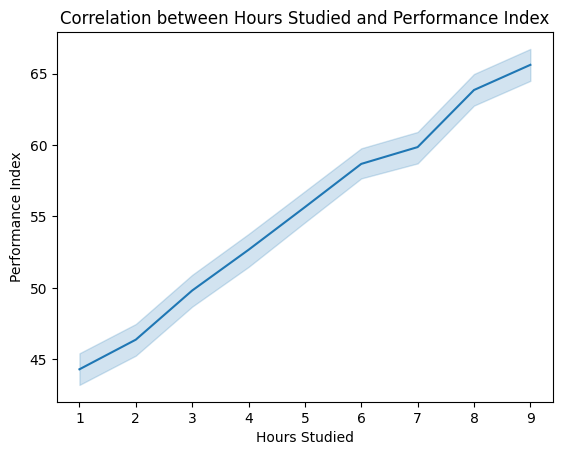

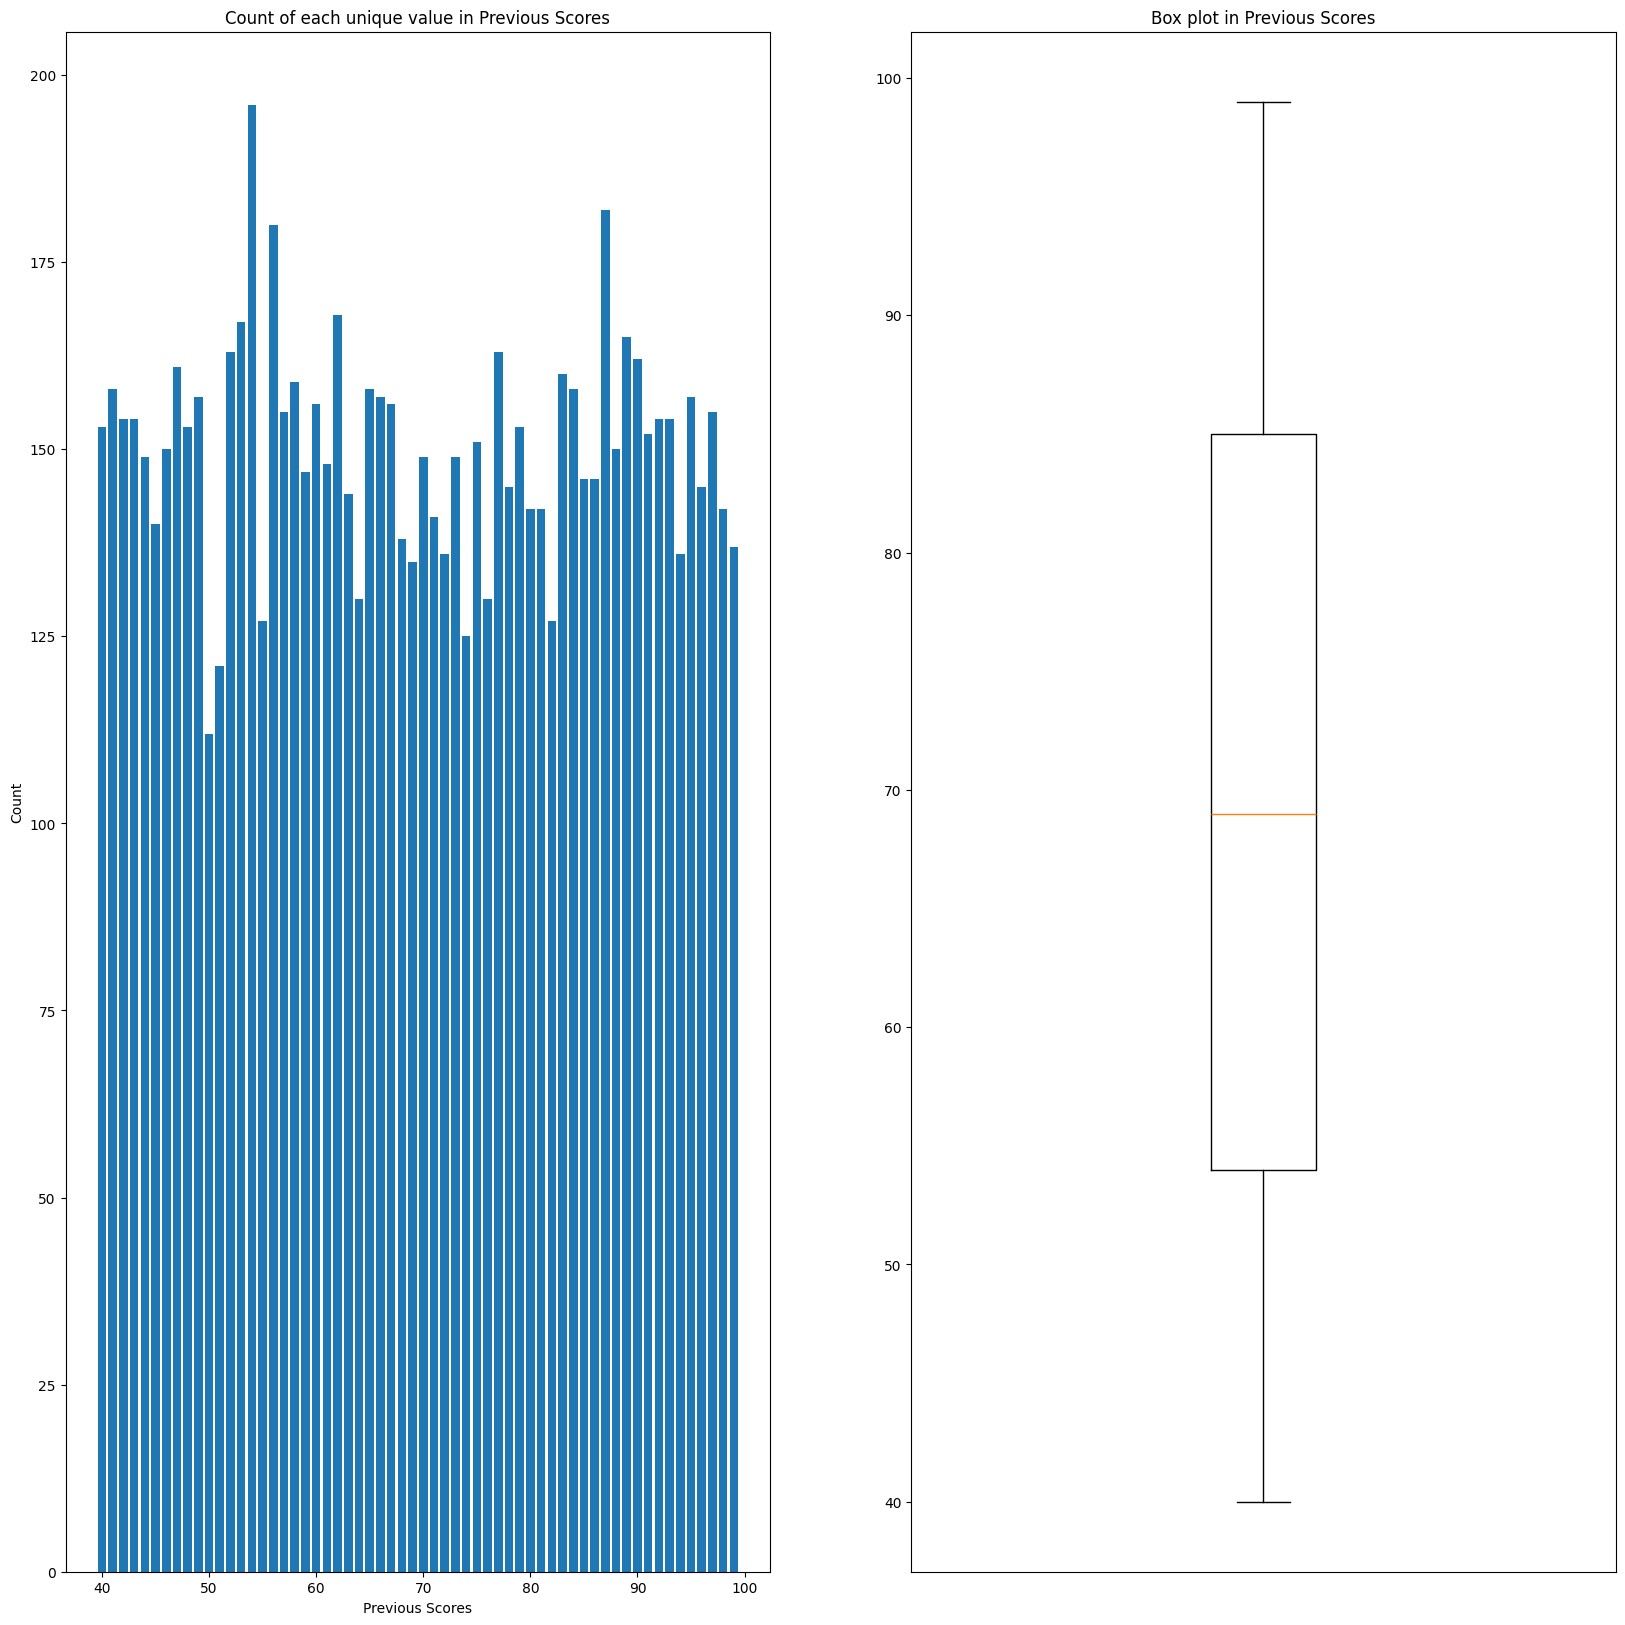

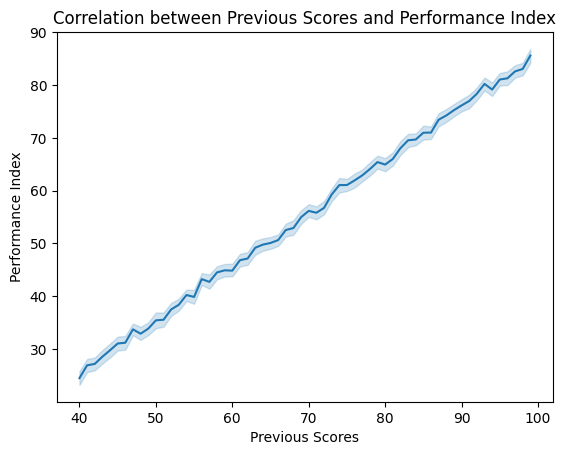

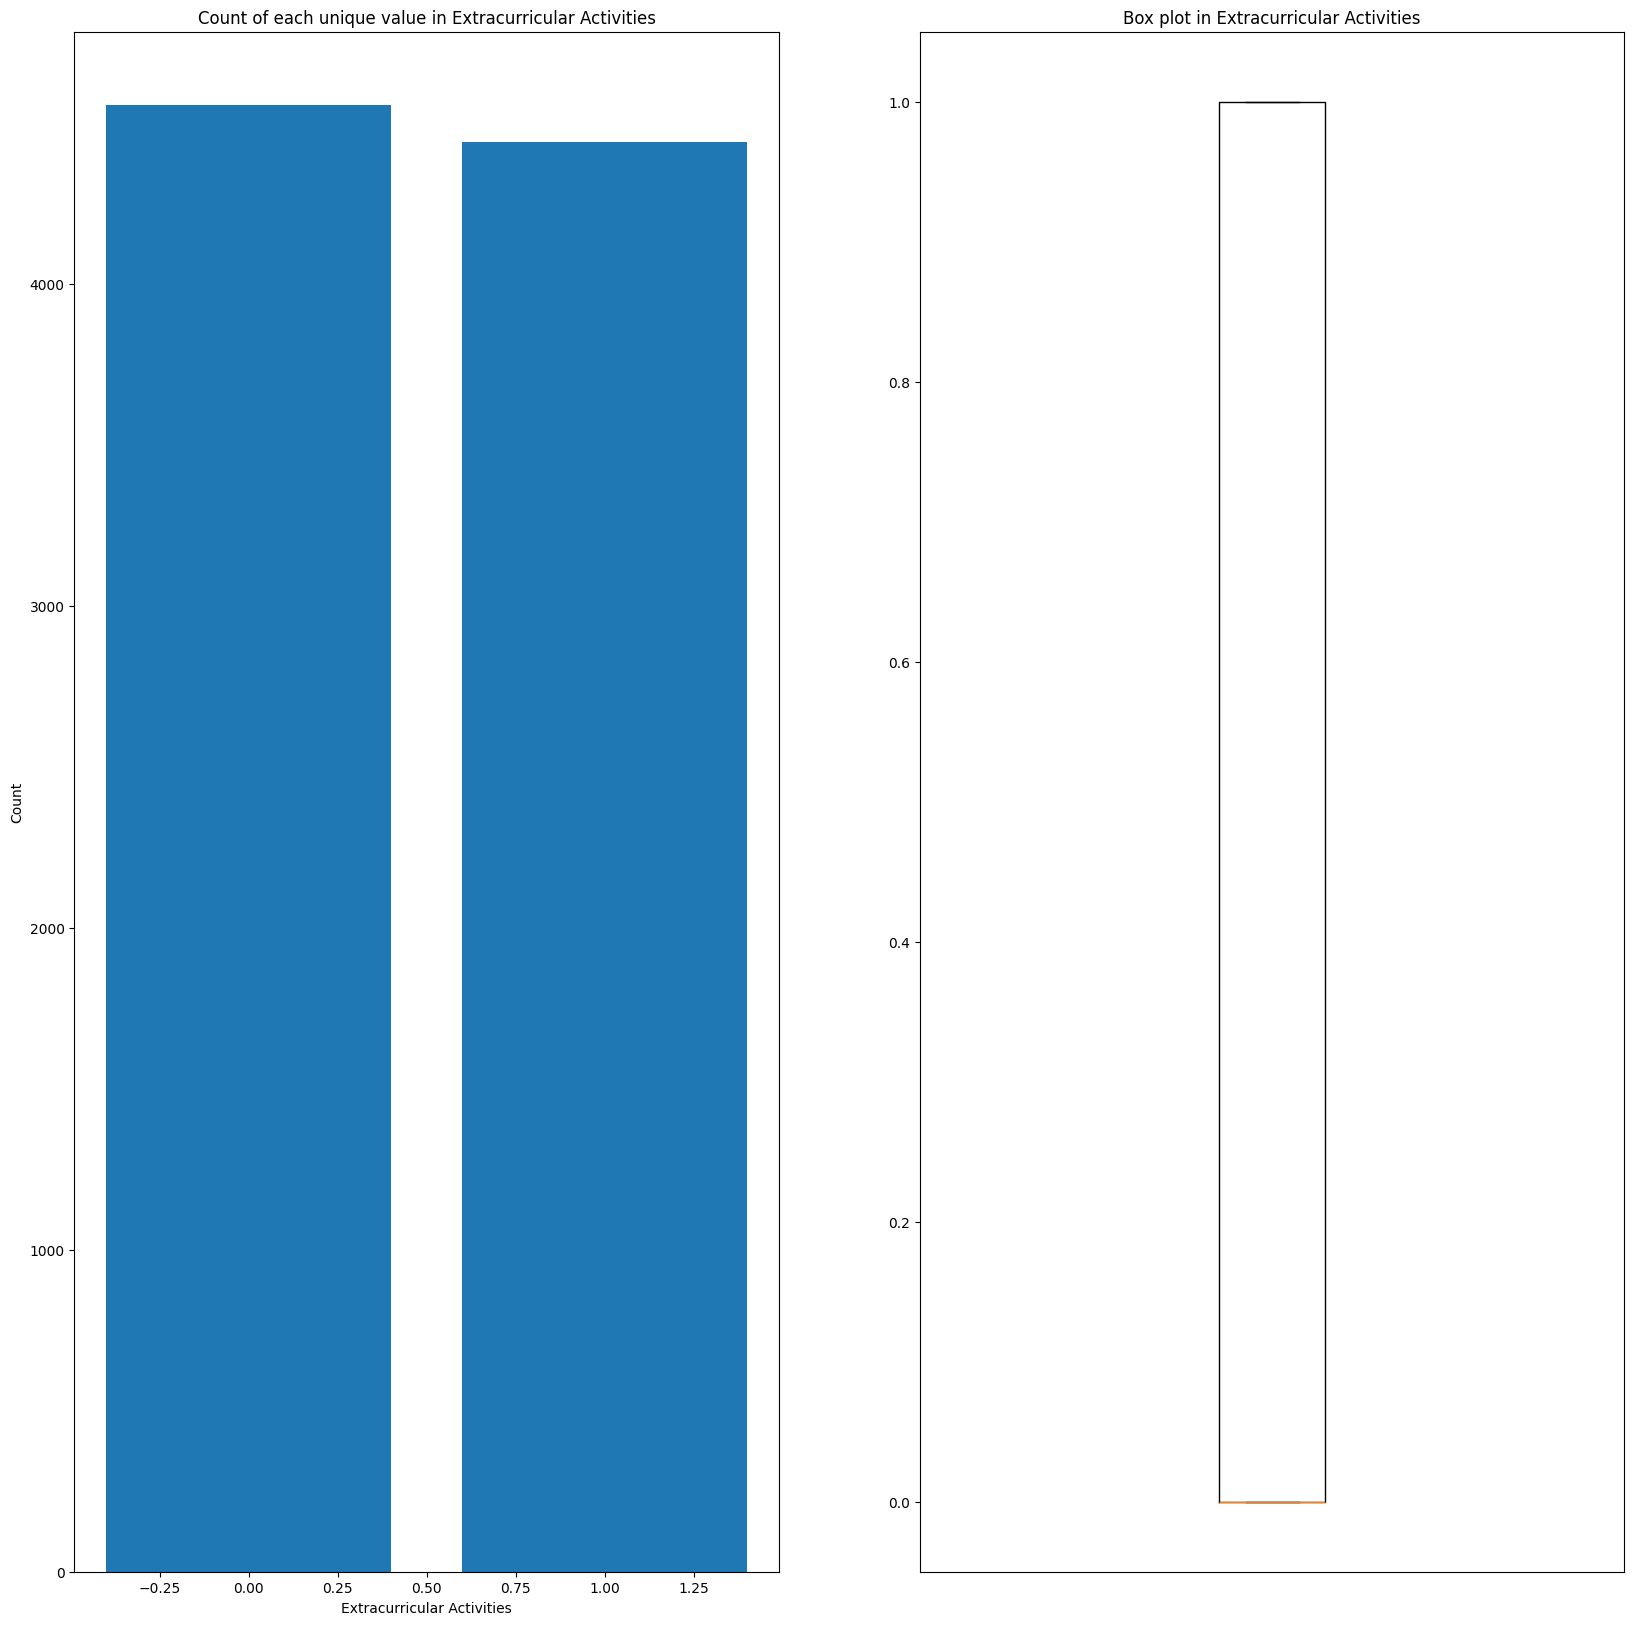

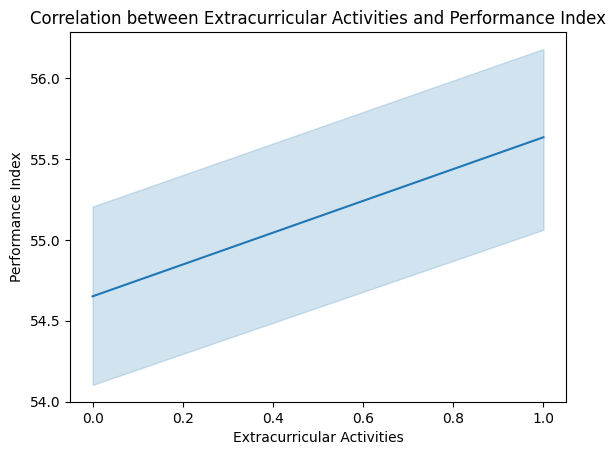

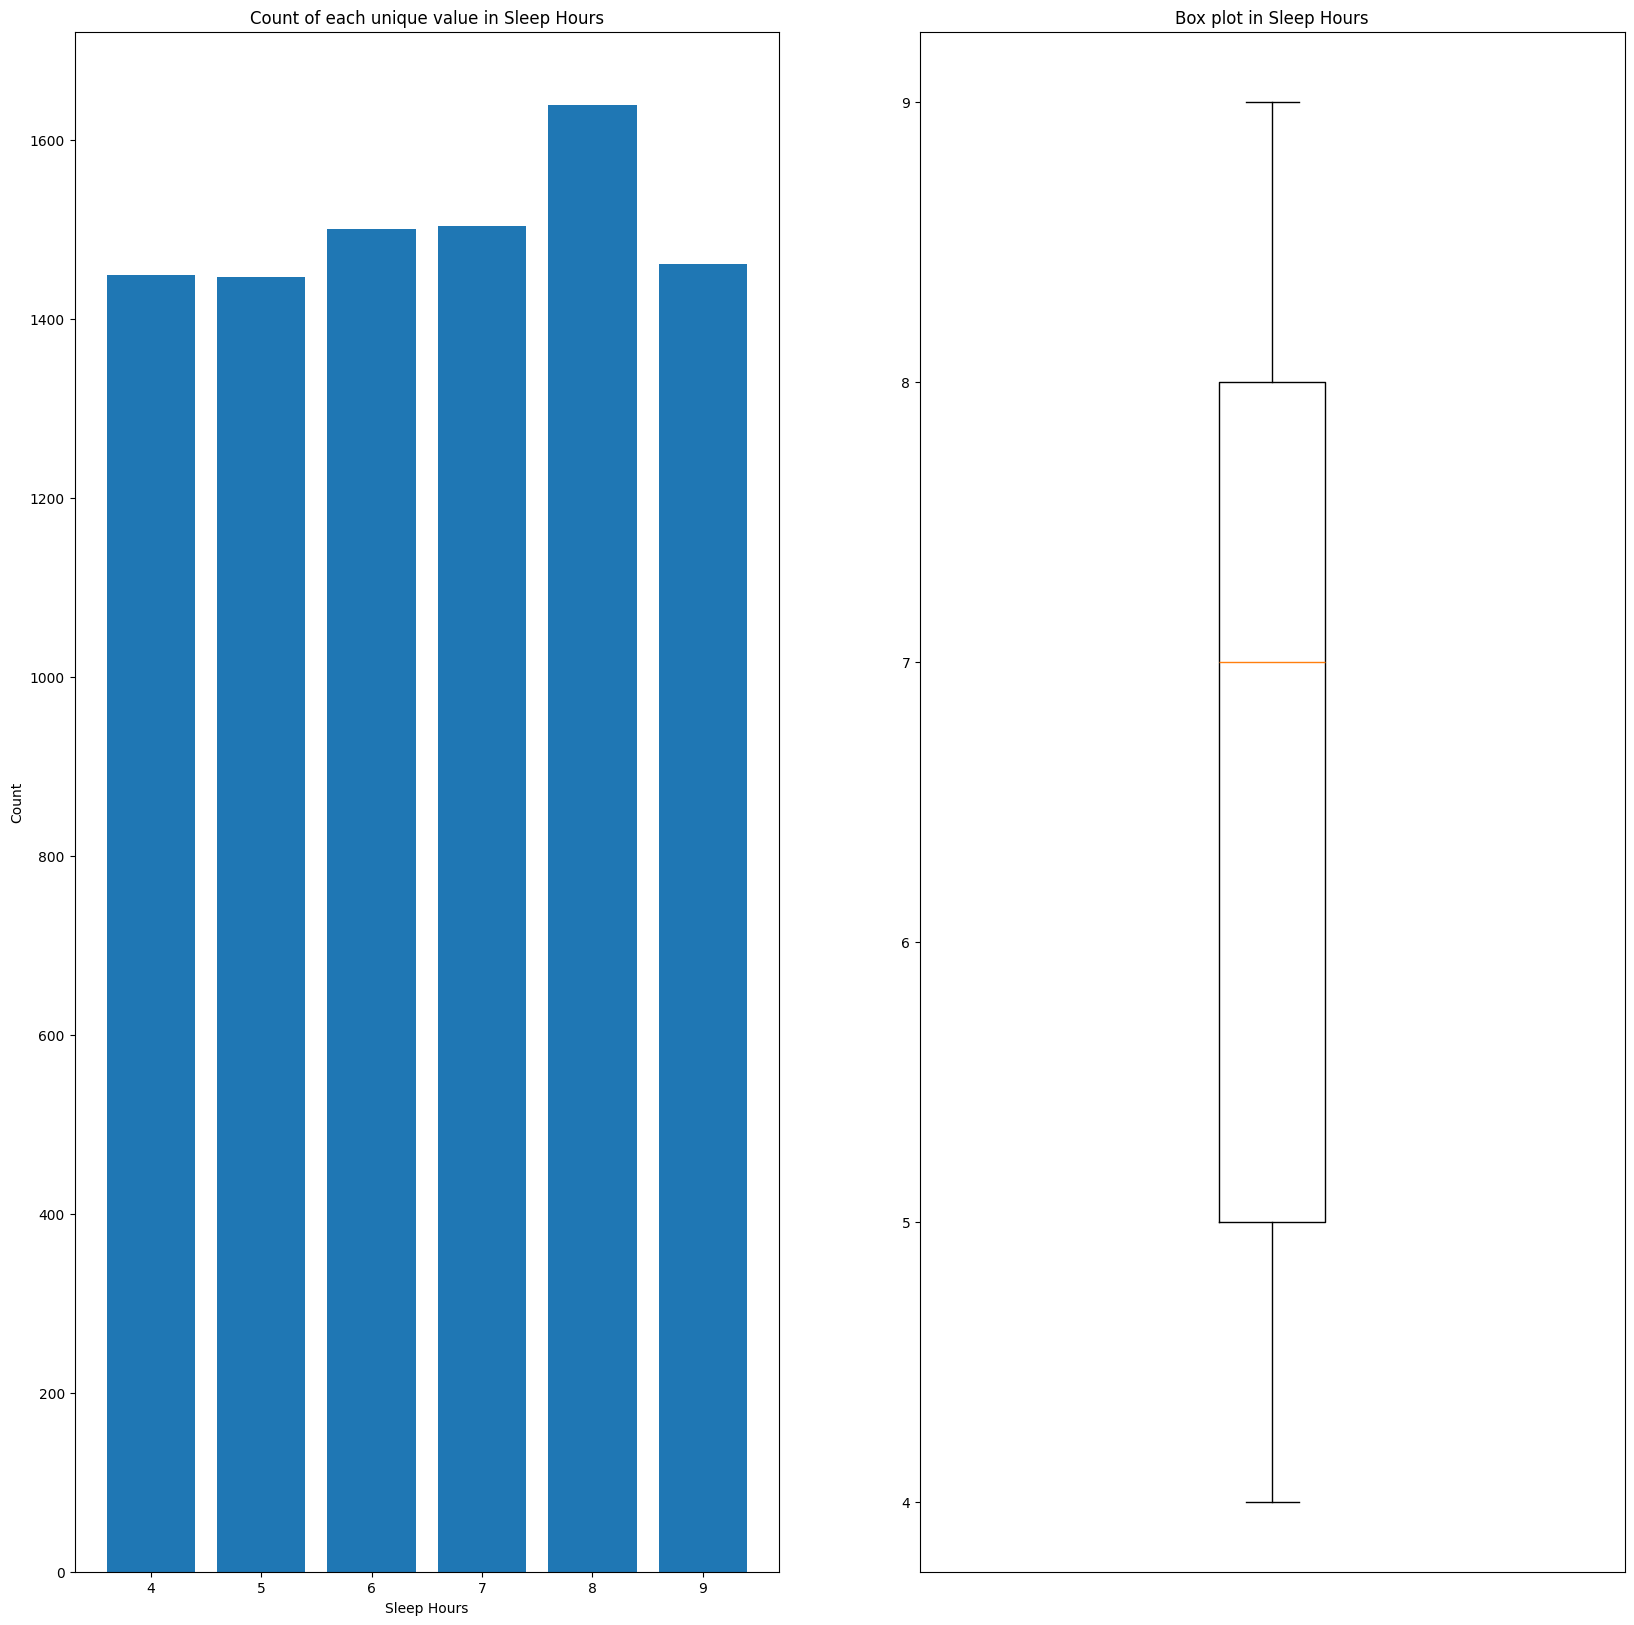

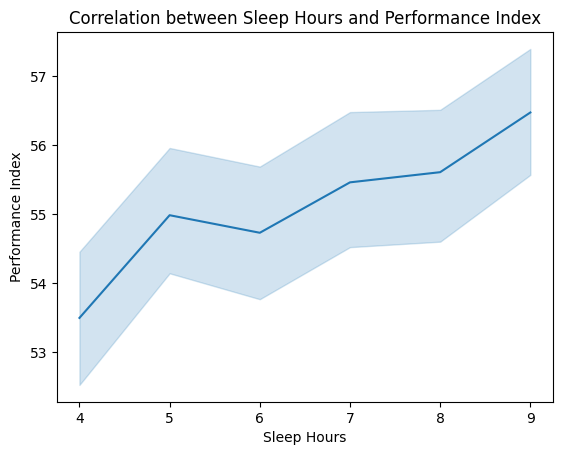

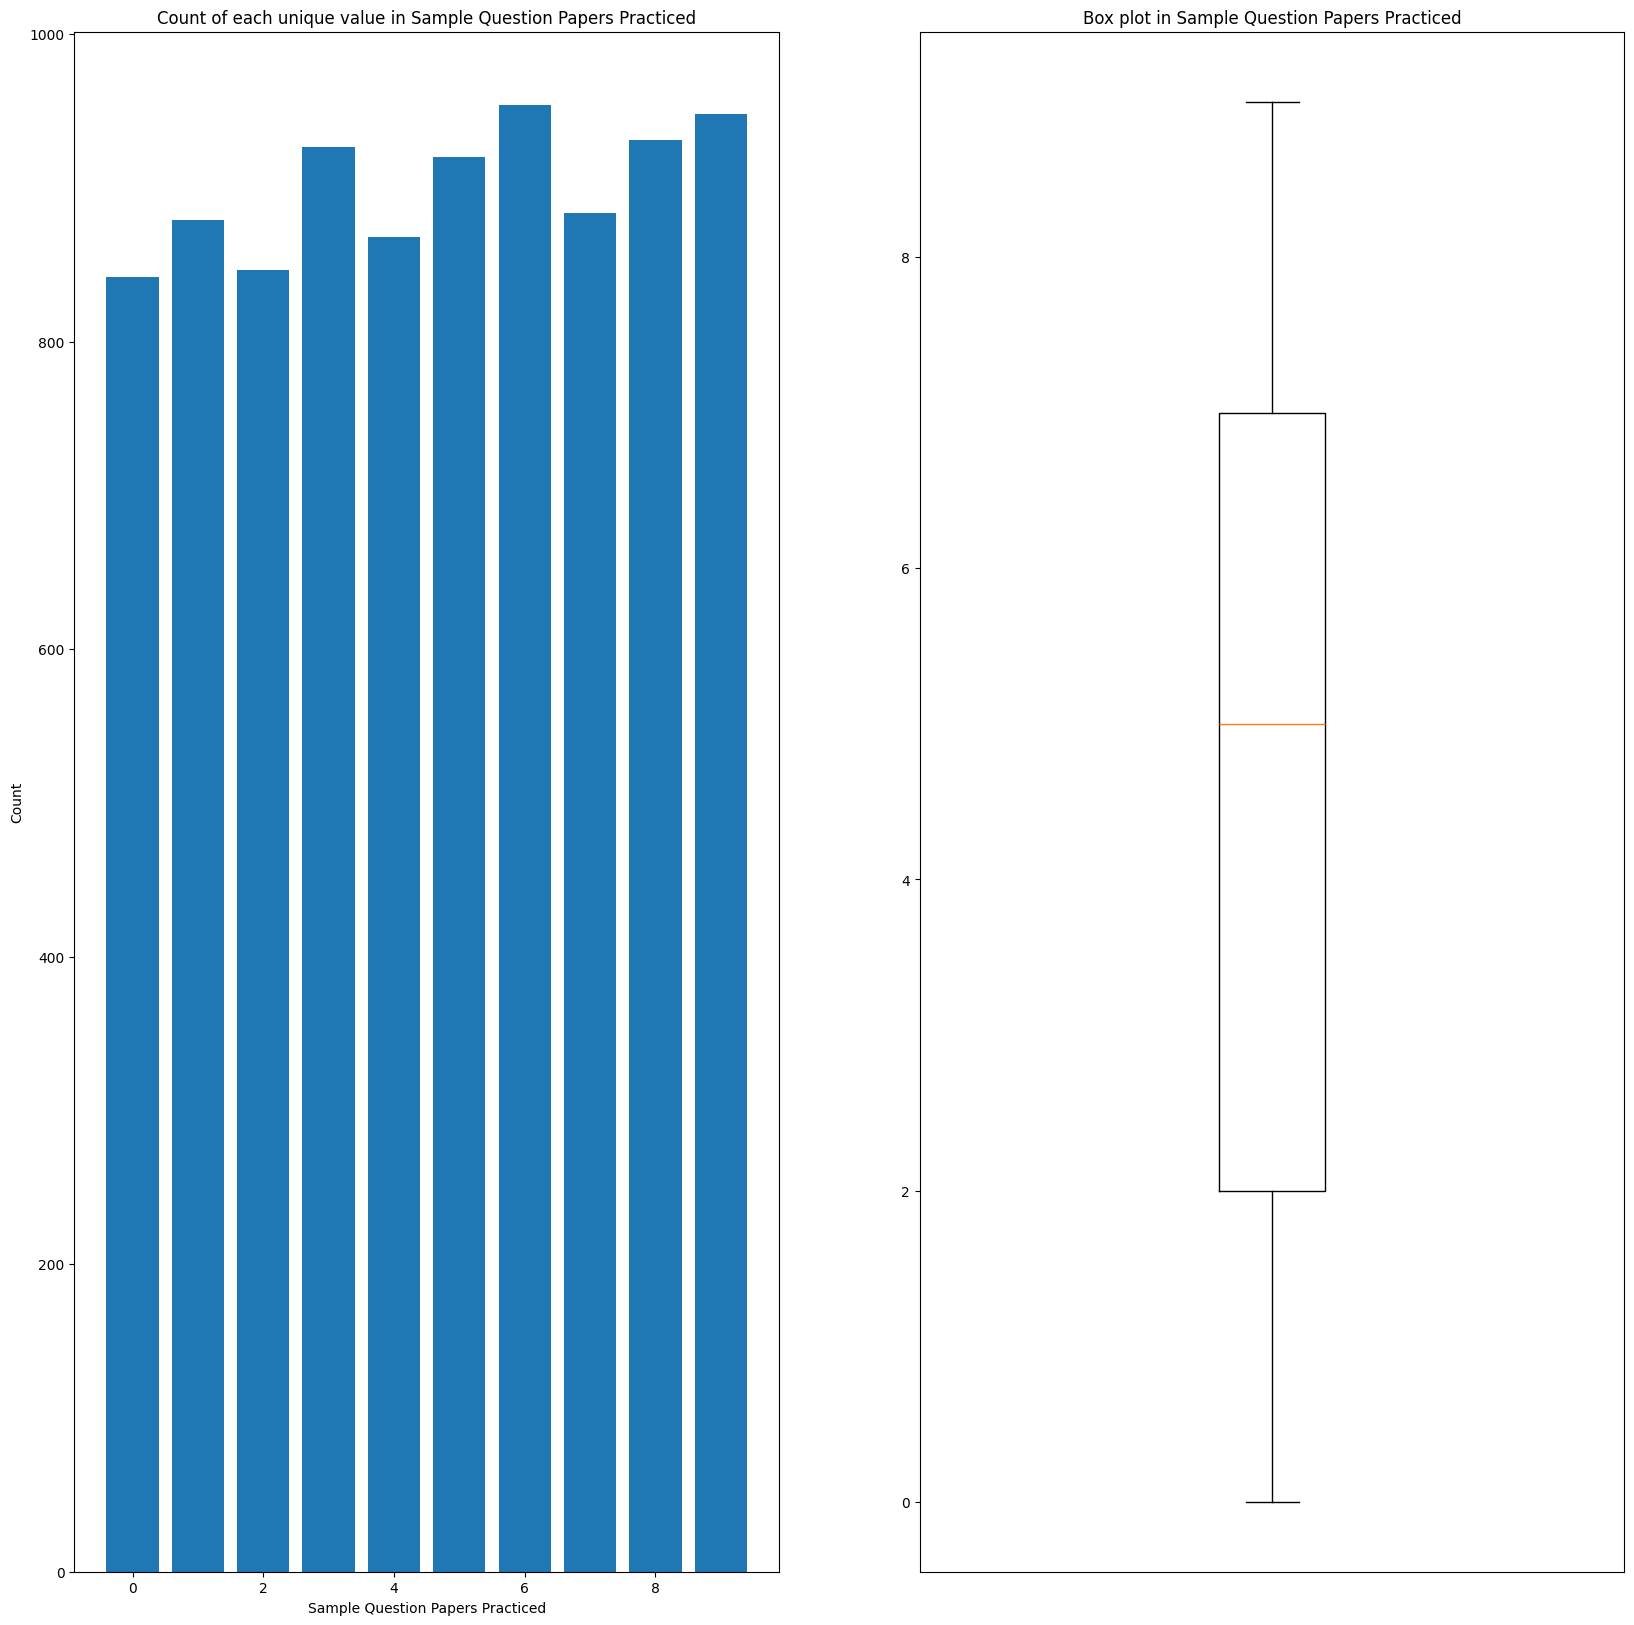

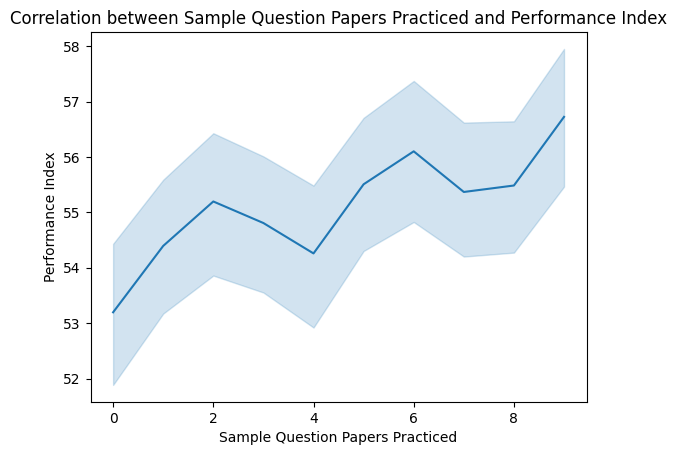

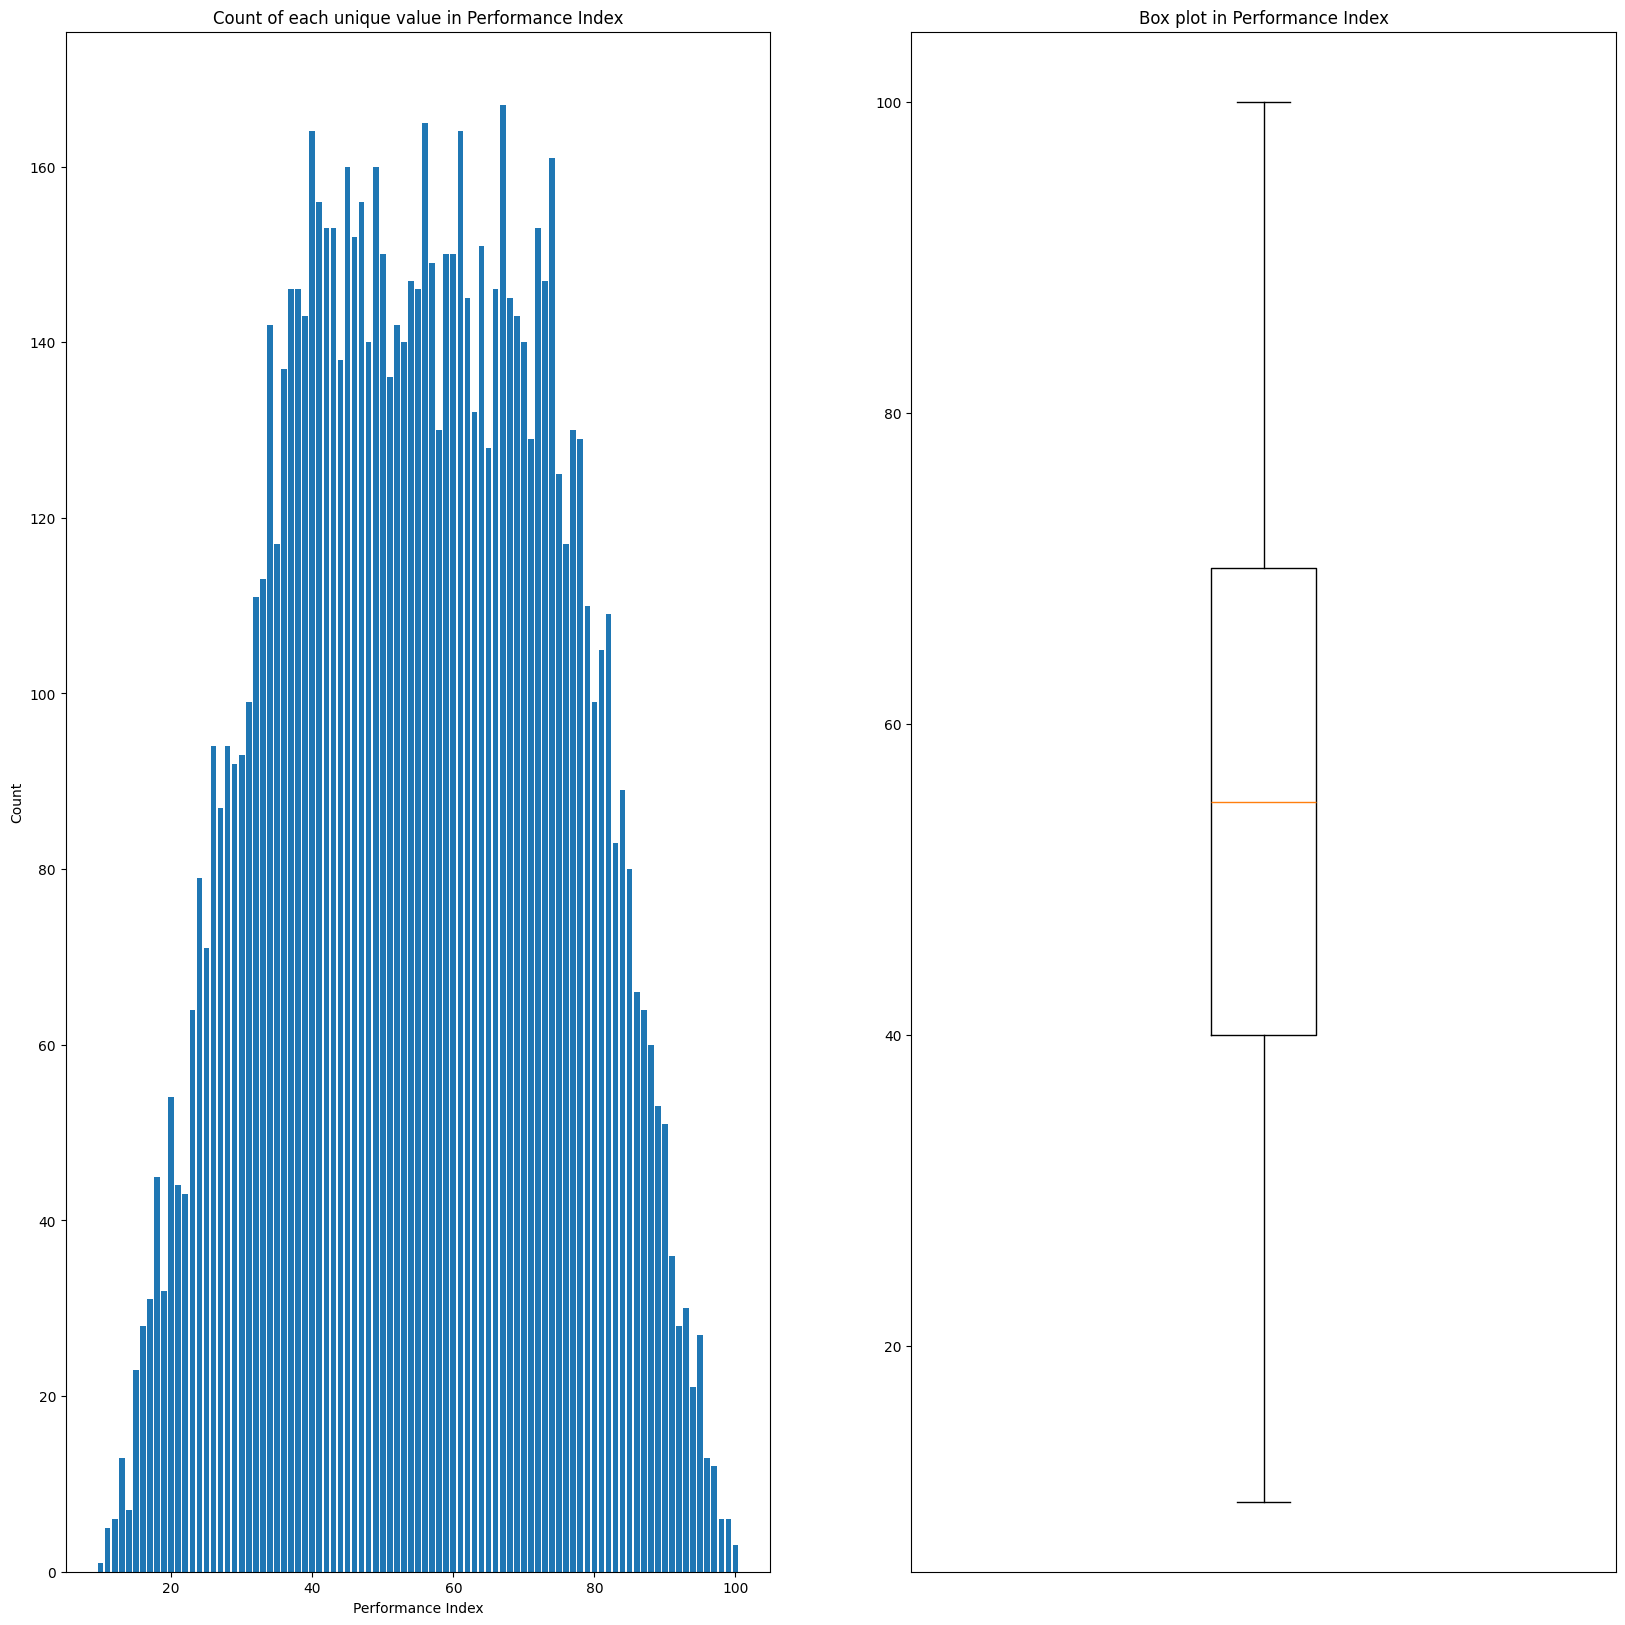

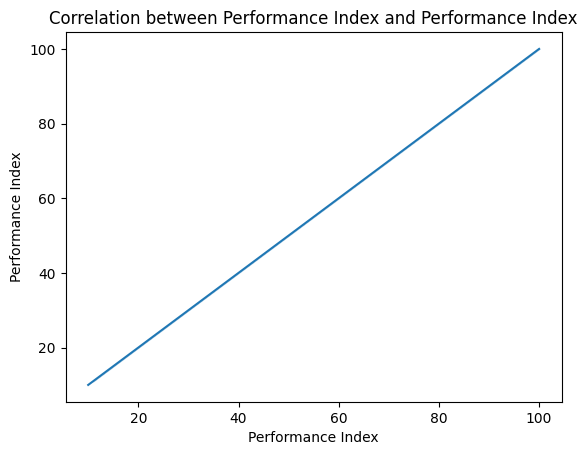

In [4]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện

# show correlation between each feature
print(f"*** Description about each feature***")
print(train.describe())
sns.heatmap(train.corr(),annot=True,cmap='viridis').set_title("Correlation between each feature")

for f in train: 
    value_counts = train[f].value_counts().sort_index()
    # Plot the bar chart
    fig, ax = plt.subplots(1, 2, figsize=(20, 20)) # 20*20 inch
    ax[0].bar(value_counts.index, value_counts.values)
    ax[0].set_xlabel(f)
    ax[0].set_ylabel('Count')
    ax[0].set_title(f'Count of each unique value in {f}')
    
    ax[1].set_title(f'Box plot in {f}')
    ax[1].xaxis.set_visible(False)
    ax[1].boxplot(train[f])
    plt.show()
    sns.lineplot(train, x=f, y=train.columns[-1]).set_title(f"Correlation between {f} and {train.columns[-1]}")

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [5]:
# Phần code cho yêu cầu 2a

# train data based on 5 features in train_dataset
LR = OLSLinearRegression().fit(X_train_pre, y_train)

# show trained_model
weights = LR.getWeights()
print(f"Student Performance = {weights[0]:.3f} + {" + ".join([f"{w:.3f}{f}" for w, f in zip(weights[1:], features_inshort)])}")

Student Performance = -33.969 + 2.852HS + 1.018PS + 0.604EA + 0.474SH + 0.192SQ


In [6]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
print(f"MAE = {MAE(y_test.to_numpy(), LR.predict(X_test_pre))}")

MAE = 1.595648688476295


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [7]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu

# shuffle train_set base on index
idx = np.arange(train.shape[0]) # create index based on number of rows from train_set
np.random.shuffle(idx) # shuffle index
X_train_shuffle = X_train.iloc[idx] # X_train selected by shuffle index, iloc: select dataset base on index
y_train_shuffle = y_train.iloc[idx]

# h_split: split in horizontally (column-wise)
features_arr = np.hsplit(X_train_shuffle.to_numpy(), X_train.shape[1])

models = [np.hstack((np.ones_like(feature), feature)) for feature in features_arr]

MAE_features = linear_regression_model(models, y_train_shuffle, k=5)
# print result
MAE_data = {
    'Mô hình với 1 đặc trưng': features,
    'MAE': MAE_features
}
df = pd.DataFrame(MAE_data, index=[1, 2, 3, 4, 5])
print(df)

            Mô hình với 1 đặc trưng        MAE
1                     Hours Studied  15.447875
2                   Previous Scores   6.619039
3        Extracurricular Activities  16.193702
4                       Sleep Hours  16.184869
5  Sample Question Papers Practiced  16.184831


In [8]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

best_model_idx = np.argmin(MAE_features)
# get array with column value 1 (index 0) and column with best feature (index = best_model_idx+1)
# the reason for +1 is because I have concatenate column of value 1 to the original array so index of column must be +1
LR = OLSLinearRegression().fit(X_train_pre[:, [0, best_model_idx+1]], y_train)

In [9]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
print(f"MAE = {MAE(y_test.to_numpy(), LR.predict(X_test_pre[:, [0, best_model_idx+1]]))}")
weights = LR.getWeights()
# show best model
print(f"Student Performance = {weights[0]:.3f} + {weights[1]:.3f}*{features_inshort[best_model_idx]}")

MAE = 6.544277293452511
Student Performance = -14.989 + 1.011*PS


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [10]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình

models_X = [
    # model 1: y = w0 + w1*HS + w2*PS
    np.hstack((np.ones_like(features_arr[0]), features_arr[0], features_arr[1])),
    # model 2: y = w0 + w1*PS^2
    np.hstack((np.ones_like(features_arr[0]), features_arr[1]**2)),
    # model 3: y = w0 + w1*HS*PS
    np.hstack((np.ones_like(features_arr[0]), features_arr[0]*features_arr[1])),
]

## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [11]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu

MAE_features = linear_regression_model(models_X, y_train_shuffle, k=5)
MAE_data = {
    'Mô hình': [
        f'Sử dụng 2 đặc trưng ({features[0]}, {features[1]}), cộng 2 đặc trưng',
        f'Sử dụng 1 đặc trưng (bình phương đặc trưng {features[1]})',
        f'Sử dụng 2 đặc trưng ({features[0]}, {features[1]}, nhân 2 đặc trưng)',
    ],
    'MAE': MAE_features
}
df = pd.DataFrame(MAE_data, index=[1, 2, 3])
print(df)

                                             Mô hình        MAE
1  Sử dụng 2 đặc trưng (Hours Studied, Previous S...   1.815936
2  Sử dụng 1 đặc trưng (bình phương đặc trưng Pre...   6.766880
3  Sử dụng 2 đặc trưng (Hours Studied, Previous S...  11.083275


In [12]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện

best_model_idx = np.argmin(MAE_features)

LR = OLSLinearRegression().fit(X_train_pre[:, :3], y_train)

In [13]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model

weights = LR.getWeights()
# show MAE
print(f"MAE = {MAE(y_test.to_numpy(), LR.predict(X_test_pre[:, :3]))}")
# show best model
print(f"Student Performance = {weights[0]:.3f} + {" + ".join([f"{w:.3f}{f}" for w, f in zip(weights[1:3], features_inshort[0:2])])}")

MAE = 1.83943639765299
Student Performance = -29.747 + 2.856HS + 1.018PS


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$